In [2]:
# Storage management
import xarray as xr   # Manages .nc (netCDF) files in Python.
                      # The states' informations are stored in a .nc file for each subject.

# Scientific computing
import numpy as np

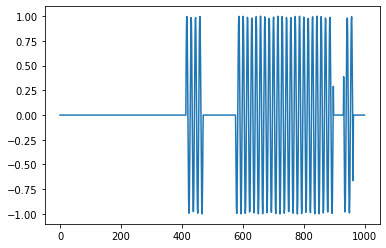

In [10]:
import matplotlib.pyplot as plt

X = np.array([np.random.normal(loc=[10, 30], scale=[1, 1.5], size=(1000, 2)) for _ in range(100)])
y = (np.random.randint(100, size=1000) == 0).astype(int)
state = 0
for i in range(y.shape[0]):
    if y[i] == 1:
        state += 1
        state = state%2
    if state == 1:
        y[i] = 1
freq1 = 352.3
freq2 = 500
burst1 = np.sin([i*y[i]*freq1 for i in range(y.shape[0])])
burst2 = np.sin([i*y[i]*freq2 for i in range(y.shape[0])])

plt.plot(np.arange(y.shape[0]), burst1)
plt.plot(np.arange(y.shape[0]), burst2)

In [5]:
data_dir = "E:/timot/Documents/1 - Centrale Marseille/0.6 - Semestre S9/2_Projet/HMM/data/"

In [6]:
subj=2
IC=1

In [7]:
ds = xr.open_dataset(data_dir + f"su{subj}IC{IC}_rawdata.nc")
ds

<xarray.Dataset>
Dimensions:     (time: 1793, trials: 675, info: 1)
Coordinates:
  * time        (time) float64 -4.0 -3.996 -3.992 -3.988 ... 2.992 2.996 3.0
Dimensions without coordinates: trials, info
Data variables:
    timecourse  (trials, time) float64 ...
    trialinfo   (trials, info) float64 ...

In [10]:
X = ds['timecourse'].values
X.shape

(675, 1793)

In [16]:
trialinfo = ds['trialinfo'].values
Y = ((trialinfo/10000).astype(int)==1)

In [18]:
Y.shape

(675, 1)